first check the data and remove missing values do knn

In [1]:
from sklearn.datasets import load_boston
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df=pd.read_csv('Car details v3.csv')

In [3]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


<AxesSubplot:>

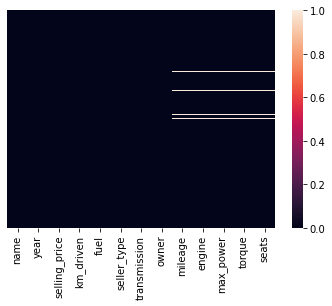

In [4]:
sns.heatmap(df.isnull(), yticklabels=False)

In [5]:
df = df.dropna()  # later we will also find the relation with nan vs price but for now we are removing this
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,7906,7906.000000,7.906000e+03,7.906000e+03,7906,7906,7906,7906,7906,7906,7906,7906,7906.000000
unique,1982,NaN,NaN,NaN,4,3,2,5,393,121,320,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4299,6563,6865,5215,225,1017,377,530,NaN
mean,NaN,2013.983936,6.498137e+05,6.918866e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416393
std,NaN,3.863695,8.135827e+05,5.679230e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959208
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.900000e+05,9.542500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
# doing dummy variable in fuel, seller type, transmission
df = pd.get_dummies(df, columns=['fuel'], drop_first=True)
df = pd.get_dummies(df, columns=['seller_type'], drop_first=True)
df = pd.get_dummies(df, columns=['transmission'], drop_first=True)

In [8]:
#replacing owner with 1,2,3,5 so that 1<2<3<5 and our model can understand the weigh of owner matters
df['owner'] = df['owner'].replace(['Test Drive Car','First Owner', 'Second Owner','Third Owner', 'Fourth & Above Owner'], [0,1,2,3,5])
df.head(6)

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,0,0,1,1,0,1
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0,0,0,1,1,0,1


In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'mileage',
       'engine', 'max_power', 'torque', 'seats', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')

In [10]:
df.isnull().sum()

name                            0
year                            0
selling_price                   0
km_driven                       0
owner                           0
mileage                         0
engine                          0
max_power                       0
torque                          0
seats                           0
fuel_Diesel                     0
fuel_LPG                        0
fuel_Petrol                     0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission_Manual             0
dtype: int64

In [11]:
# remove kmpl, CC, bhp from mileage, engine, max_power
df['mileage'] = df["mileage"].str.replace(" kmpl","")
df['mileage'] = df["mileage"].str.replace(" km/kg","")
df['mileage'] = df['mileage'].astype(float)

In [12]:
df['seats'] = df['seats'].astype(int)

In [13]:
df['engine'] = df["engine"].str.replace(" CC","")
df['engine'] = df['engine'].astype(float)

In [14]:
df['max_power'] = df["max_power"].str.replace(" bhp","")
df['max_power'] = df['max_power'].astype(float)

In [15]:
df

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5,0,0,1,1,0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,5,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,1,0,0,1,0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5,1,0,0,1,0,1
8126,Tata Indigo CR4,2013,290000,25000,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5,1,0,0,1,0,1


In [16]:
def torque_fxn (torque):
    torque = torque.lower()
    a='@'
    b = 'kgm'
    c1 = '('
    c = 'nm'
    d = '/'
    
    if c in torque:
        torque = torque.split('nm')
        torque = torque[0].strip()
        if a in torque:
            torque = torque.split('@')
            torque = torque[0]
        return (float(torque))

        
    elif b in torque:
        torque = torque.split('kgm')
        torque = torque[0].strip()
            
        if a in torque:
                torque = torque.split('@')
                torque = torque[0]
        return( float(torque)*9.8)
        

            
    elif a in torque:
        torque = torque.split('@')
        torque = torque[0]

        if c1 in torque:
            torque = torque.split('(')

            torque = torque[0].strip()
            return ( float(torque))
        return(float(torque)*9.8)
    elif d in torque:
            torque = torque.split('/')
            torque = torque[0].strip()
            return (float(torque))

In [17]:
df['torque'] = df['torque'].map(torque_fxn)

In [19]:
df

,name,year,selling_price,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014,450000,145500,1,23.40,1248.0,74.00,190.00,5,1,0,0,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,21.14,1498.0,103.52,250.00,5,1,0,0,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,3,17.70,1497.0,78.00,124.46,5,0,0,1,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,23.00,1396.0,90.00,219.52,5,1,0,0,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,1,16.10,1298.0,88.20,112.70,5,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,1,18.50,1197.0,82.85,113.70,5,0,0,1,1,0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,5,16.80,1493.0,110.00,235.20,5,1,0,0,1,0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,19.30,1248.0,73.90,190.00,5,1,0,0,1,0,1
8126,Tata Indigo CR4,2013,290000,25000,1,23.57,1396.0,70.00,140.00,5,1,0,0,1,0,1


is there any relation between null value and price of car.
mean of all car with nul value vs mean of all car without nul values


In [20]:
df.dtypes

name                             object
year                              int64
selling_price                     int64
km_driven                         int64
owner                             int64
mileage                         float64
engine                          float64
max_power                       float64
torque                          float64
seats                             int64
fuel_Diesel                       uint8
fuel_LPG                          uint8
fuel_Petrol                       uint8
seller_type_Individual            uint8
seller_type_Trustmark Dealer      uint8
transmission_Manual               uint8
dtype: object

In [21]:
x = df.drop(['selling_price'],axis=1)
y = df[['selling_price']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size=0.01)

In [22]:
print(x_train.shape)
print(x_cv.shape)
print(x_test.shape)

(6317, 15)
(7, 15)
(1582, 15)


In [23]:
# we are vectorizing separately to stop data leakage
vectorizer = CountVectorizer()
vectorizer.fit(x_train['name'].values) # fit has to happen only on train data
# we use the fitted CountVectorizer to convert the text to vector
x_train_name = vectorizer.transform(x_train['name'].values)
x_cv_name = vectorizer.transform(x_cv['name'].values)
x_test_name = vectorizer.transform(x_test['name'].values)

In [24]:
print(x_cv_name.shape)

(7, 736)


In [25]:
x_train_name = pd.DataFrame(x_train_name.toarray(),index=x_train.index.copy())
x_cv_name = pd.DataFrame(x_cv_name.toarray(),index=x_cv.index.copy())
x_test_name = pd.DataFrame(x_test_name.toarray(),index=x_test.index.copy())

In [26]:
print(x_cv_name.shape, x_cv.shape,x_train_name.shape )

(7, 736) (7, 15) (6317, 736)


In [27]:
x_train = x_train.drop(['name'],axis=1)
x_cv = x_cv.drop(['name'],axis=1)
x_test = x_test.drop(['name'],axis=1)
x_cv.shape

(7, 14)

In [28]:
print(x_cv_name.shape, x_cv.shape)

(7, 736) (7, 14)


In [29]:
x_train = pd.concat([x_train, x_train_name], axis=1)
x_cv = pd.concat([x_cv, x_cv_name], axis=1)
x_test = pd.concat([x_test, x_test_name], axis=1)

In [30]:
print(x_cv.shape)
x_cv

(7, 750)


,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,726,727,728,729,730,731,732,733,734,735
1209,2010,100000,2,20.00,1399.0,68.00,160.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
1313,2012,120000,3,19.01,1461.0,108.45,248.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
5472,2012,77000,1,20.40,1248.0,91.70,209.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
6567,2017,56290,1,24.00,1186.0,73.97,190.24,5,1,0,...,0,0,0,0,0,0,0,0,0,0
3993,2018,17000,1,23.00,1498.0,98.96,205.00,5,1,0,...,0,0,0,0,0,0,0,0,0,0
236,2017,37000,1,19.67,1582.0,126.20,259.90,5,1,0,...,0,0,0,0,0,0,0,0,0,0
6140,2015,49907,1,21.63,998.0,67.04,90.00,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
x_train.to_csv('x_train_final.csv')
x_test.to_csv('x_train.csv')
x_cv.to_csv('x_train_name.csv')

In [32]:
x_train_normal= x_train.copy()
x_train_normal

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,726,727,728,729,730,731,732,733,734,735
5664,2013,110000,2,15.10,2179.0,140.00,330.0,7,1,0,...,0,0,0,0,0,0,0,0,0,0
6257,2017,10000,1,23.10,998.0,67.04,90.0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
2520,2015,60000,1,26.59,1248.0,74.00,190.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4716,2014,35000,2,16.70,1172.0,64.10,96.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
5430,2019,10000,1,17.30,1497.0,121.00,300.0,7,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,2011,80000,2,15.60,1196.0,70.00,102.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,2014,50000,2,21.79,1248.0,88.73,200.0,5,1,0,...,0,0,0,0,0,0,0,0,0,0
3524,2016,56494,1,18.20,1199.0,88.70,110.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2724,2016,40000,1,22.74,796.0,47.30,69.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_normal['year']=scaler.fit_transform(x_train_normal['year'].values.reshape(-1,1))
x_train_normal['km_driven']=scaler.fit_transform(x_train_normal['km_driven'].values.reshape(-1,1))
x_train_normal['owner']=scaler.fit_transform(x_train_normal['owner'].values.reshape(-1,1))
x_train_normal['mileage']=scaler.fit_transform(x_train_normal['mileage'].values.reshape(-1,1))
x_train_normal['engine']=scaler.fit_transform(x_train_normal['engine'].values.reshape(-1,1))
x_train_normal['max_power']=scaler.fit_transform(x_train_normal['max_power'].values.reshape(-1,1))
x_train_normal['seats']=scaler.fit_transform(x_train_normal['seats'].values.reshape(-1,1))
x_train_normal['torque']=scaler.fit_transform(x_train_normal['torque'].values.reshape(-1,1))

In [34]:
x_cv['year']=scaler.fit_transform(x_cv['year'].values.reshape(-1,1))
x_cv['km_driven']=scaler.fit_transform(x_cv['km_driven'].values.reshape(-1,1))
x_cv['owner']=scaler.fit_transform(x_cv['owner'].values.reshape(-1,1))
x_cv['mileage']=scaler.fit_transform(x_cv['mileage'].values.reshape(-1,1))
x_cv['engine']=scaler.fit_transform(x_cv['engine'].values.reshape(-1,1))
x_cv['max_power']=scaler.fit_transform(x_cv['max_power'].values.reshape(-1,1))
x_cv['seats']=scaler.fit_transform(x_cv['seats'].values.reshape(-1,1))
x_cv['torque']=scaler.fit_transform(x_cv['torque'].values.reshape(-1,1))

In [35]:
x_test['year']=scaler.fit_transform(x_test['year'].values.reshape(-1,1))
x_test['km_driven']=scaler.fit_transform(x_test['km_driven'].values.reshape(-1,1))
x_test['owner']=scaler.fit_transform(x_test['owner'].values.reshape(-1,1))
x_test['mileage']=scaler.fit_transform(x_test['mileage'].values.reshape(-1,1))
x_test['engine']=scaler.fit_transform(x_test['engine'].values.reshape(-1,1))
x_test['max_power']=scaler.fit_transform(x_test['max_power'].values.reshape(-1,1))
x_test['seats']=scaler.fit_transform(x_test['seats'].values.reshape(-1,1))
x_test['torque']=scaler.fit_transform(x_test['torque'].values.reshape(-1,1))

In [36]:
x_train=x_train_normal.copy()
x_train

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,726,727,728,729,730,731,732,733,734,735
5664,0.730769,0.046601,0.4,0.359524,0.521812,0.291939,0.057153,0.416667,1,0,...,0,0,0,0,0,0,0,0,0,0
6257,0.884615,0.004236,0.2,0.550000,0.125503,0.093246,0.008677,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,1
2520,0.807692,0.025418,0.2,0.633095,0.209396,0.112200,0.028875,0.250000,1,0,...,0,0,0,0,0,0,0,0,0,0
4716,0.769231,0.014827,0.4,0.397619,0.183893,0.085240,0.009889,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
5430,0.961538,0.004236,0.2,0.411905,0.292953,0.240196,0.051093,0.416667,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,0.653846,0.033891,0.4,0.371429,0.191946,0.101307,0.011101,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0.769231,0.021182,0.4,0.518810,0.209396,0.152315,0.030895,0.250000,1,0,...,0,0,0,0,0,0,0,0,0,0
3524,0.846154,0.023933,0.2,0.433333,0.192953,0.152233,0.012717,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0
2724,0.846154,0.016945,0.2,0.541429,0.057718,0.039488,0.004436,0.250000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
x_cv

,year,km_driven,owner,mileage,engine,max_power,torque,seats,fuel_Diesel,fuel_LPG,...,726,727,728,729,730,731,732,733,734,735
1209,0.000,0.805825,0.5,0.198397,0.686644,0.016227,0.412007,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1313,0.250,1.000000,1.0,0.000000,0.792808,0.699966,0.929959,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5472,0.250,0.582524,0.0,0.278557,0.428082,0.416836,0.700412,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
6567,0.875,0.381456,0.0,1.000000,0.321918,0.117140,0.589994,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3993,1.000,0.000000,0.0,0.799599,0.856164,0.539554,0.676869,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
236,0.875,0.194175,0.0,0.132265,1.000000,1.000000,1.000000,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
6140,0.625,0.319485,0.0,0.525050,0.000000,0.000000,0.000000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
print(x_train.dtypes)

year         float64
km_driven    float64
owner        float64
mileage      float64
engine       float64
              ...   
731            int64
732            int64
733            int64
734            int64
735            int64
Length: 750, dtype: object


In [39]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'owner', 'mileage',
       'engine', 'max_power', 'torque', 'seats', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual'],
      dtype='object')

In [40]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
hidden_units1 = 640
hidden_units2 = 800
hidden_units3 = 640
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')

  ])
    
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

2023-01-14 02:41:38.258002: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
79/79 [==============================] - 3s 32ms/step - loss: 5.2379 - mean_squared_logarithmic_error: 5.2350 - val_loss: 0.3632 - val_mean_squared_logarithmic_error: 0.3617
Epoch 2/100
79/79 [==============================] - 2s 27ms/step - loss: 0.2185 - mean_squared_logarithmic_error: 0.2185 - val_loss: 0.1415 - val_mean_squared_logarithmic_error: 0.1411
Epoch 3/100
79/79 [==============================] - 2s 26ms/step - loss: 0.1045 - mean_squared_logarithmic_error: 0.1045 - val_loss: 0.0903 - val_mean_squared_logarithmic_error: 0.0899
Epoch 4/100
79/79 [==============================] - 3s 32ms/step - loss: 0.0739 - mean_squared_logarithmic_error: 0.0738 - val_loss: 0.0750 - val_mean_squared_logarithmic_error: 0.0746
Epoch 5/100
79/79 [==============================] - 2s 31ms/step - loss: 0.0624 - mean_squared_logarithmic_error: 0.0624 - val_loss: 0.0723 - val_mean_squared_logarithmic_error: 0.0719
Epoch 6/100
79/79 [==============================] - 2s 24ms/step - lo

Epoch 45/100
79/79 [==============================] - 2s 29ms/step - loss: 0.0277 - mean_squared_logarithmic_error: 0.0277 - val_loss: 0.0511 - val_mean_squared_logarithmic_error: 0.0509
Epoch 46/100
79/79 [==============================] - 2s 29ms/step - loss: 0.0279 - mean_squared_logarithmic_error: 0.0279 - val_loss: 0.0518 - val_mean_squared_logarithmic_error: 0.0516
Epoch 47/100
79/79 [==============================] - 2s 28ms/step - loss: 0.0281 - mean_squared_logarithmic_error: 0.0281 - val_loss: 0.0508 - val_mean_squared_logarithmic_error: 0.0505
Epoch 48/100
79/79 [==============================] - 2s 30ms/step - loss: 0.0274 - mean_squared_logarithmic_error: 0.0274 - val_loss: 0.0518 - val_mean_squared_logarithmic_error: 0.0515
Epoch 49/100
79/79 [==============================] - 2s 27ms/step - loss: 0.0269 - mean_squared_logarithmic_error: 0.0269 - val_loss: 0.0501 - val_mean_squared_logarithmic_error: 0.0499
Epoch 50/100
79/79 [==============================] - 2s 25ms/ste

Epoch 89/100
79/79 [==============================] - 2s 23ms/step - loss: 0.0244 - mean_squared_logarithmic_error: 0.0244 - val_loss: 0.0492 - val_mean_squared_logarithmic_error: 0.0490
Epoch 90/100
79/79 [==============================] - 2s 23ms/step - loss: 0.0251 - mean_squared_logarithmic_error: 0.0251 - val_loss: 0.0492 - val_mean_squared_logarithmic_error: 0.0489
Epoch 91/100
79/79 [==============================] - 2s 24ms/step - loss: 0.0251 - mean_squared_logarithmic_error: 0.0251 - val_loss: 0.0469 - val_mean_squared_logarithmic_error: 0.0467
Epoch 92/100
79/79 [==============================] - 2s 23ms/step - loss: 0.0259 - mean_squared_logarithmic_error: 0.0259 - val_loss: 0.0491 - val_mean_squared_logarithmic_error: 0.0488
Epoch 93/100
79/79 [==============================] - 2s 26ms/step - loss: 0.0246 - mean_squared_logarithmic_error: 0.0246 - val_loss: 0.0492 - val_mean_squared_logarithmic_error: 0.0490
Epoch 94/100
79/79 [==============================] - 2s 25ms/ste

In [41]:
y_pred10 = model.predict(x_test)

x_test_result = pd.DataFrame(y_pred10,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,401247.187500
672,950000,882220.687500
7686,650000,759868.687500
8110,425000,425411.718750
6386,270000,215932.875000
...,...,...
6095,684000,577198.250000
5641,490000,419443.000000
5386,390000,251804.109375
926,600000,580953.062500


In [42]:
from sklearn.metrics import r2_score
y_true = x_test_result['selling_price']
y_pred = x_test_result['predicted']
r2_score(y_true, y_pred)

0.9662656755923245

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that a

Variance score or r_sq: 0.975612699928549


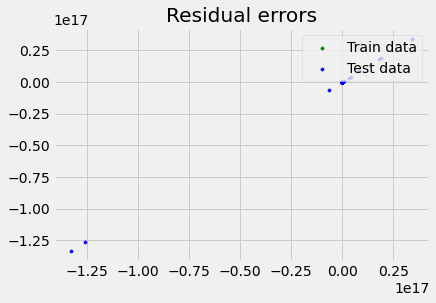

In [43]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
model = linear_model.LinearRegression()
# train the model using the training sets
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

print('Variance score or r_sq: {}'.format(model.score(x_train, y_train))) 

In [44]:
x_train_result = pd.DataFrame(y_pred,index=x_train.index.copy())
x_train_result.columns = ['predicted']
x_train_result = pd.concat([y_train, x_train_result], axis=1)
x_train_result

,selling_price,predicted
5664,750000,716728.0
6257,484999,552944.0
2520,610000,560056.0
4716,210000,312064.0
5430,1450000,1455520.0
...,...,...
7641,240000,283072.0
1579,425000,415440.0
3524,550000,538952.0
2724,220000,298640.0


In [45]:
from sklearn.neighbors import NearestNeighbors
for K in range(1,12):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train,y_train)
    y_pred7 = model.predict(x_test)
    print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))
    model.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance score or r_sq: 0.9600770392735989


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [46]:
# this model is corrected by lasso regression
model.fit(x_train, y_train)
y_pred1 = model.predict(x_test)
# regression coefficients
# print('Coefficients: ', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance score or r_sq: 0.9600770392735989


In [47]:
x_test_result = pd.DataFrame(y_pred1,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,580000.0
672,950000,875000.0
7686,650000,880000.0
8110,425000,390500.0
6386,270000,235000.0
...,...,...
6095,684000,625000.0
5641,490000,544999.5
5386,390000,390000.0
926,600000,737500.0


In [48]:
# SGD, better then simple linear regression but we find lasso a better model 
model = linear_model.SGDRegressor(max_iter = 1000,penalty = "elasticnet",loss = 'huber',tol = 1e-3, average = True)
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Variance score or r_sq: -0.6338404443485508


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [49]:
x_test_result = pd.DataFrame(y_pred2,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,424.680824
672,950000,446.287897
7686,650000,452.794485
8110,425000,430.813535
6386,270000,438.085855
...,...,...
6095,684000,442.524754
5641,490000,412.037887
5386,390000,409.962285
926,600000,434.212004


In [50]:

# svm fails to perform
from sklearn.svm import SVR
model = SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.1, tol=0.001, C=1.0, epsilon=0.001, shrinking=False, cache_size=200, verbose=False, max_iter=-1)
model.fit(x_train,y_train)
y_pred4 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names onl

Variance score or r_sq: -0.057317819404469894


In [51]:
x_test_result = pd.DataFrame(y_pred4,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,449964.583730
672,950000,450179.282439
7686,650000,450188.870901
8110,425000,449946.551140
6386,270000,450108.298342
...,...,...
6095,684000,450157.935926
5641,490000,450183.676807
5386,390000,450166.130960
926,600000,450212.071923


In [52]:
from sklearn.metrics import r2_score
y_true = x_test_result['selling_price']
y_pred = x_test_result['predicted']
r2_score(y_true, y_pred)

-0.057317819404469894

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x_train,y_train)
y_pred9 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

x_test_result = pd.DataFrame(y_pred9,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/var/folders/_0/6mxrdhbx3ynb4d0_h8gp41tw0000gn/T/ipykernel_2563/166101006.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Variance score or r_sq: 0.9079013782278719


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,selling_price,predicted
1759,450000,481830.00
672,950000,938439.98
7686,650000,810319.96
8110,425000,456764.85
6386,270000,270179.98
...,...,...
6095,684000,549029.75
5641,490000,453639.72
5386,390000,361129.94
926,600000,707149.71


In [54]:
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train,y_train)
y_pred5 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance score or r_sq: 0.5842329352219109


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [55]:
# this classifier is not performing well
from sklearn.ensemble import RandomForestClassifier  
model= RandomForestClassifier(n_estimators= 10, criterion='gini')
model.fit(x_train,y_train)
y_pred5 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/var/folders/_0/6mxrdhbx3ynb4d0_h8gp41tw0000gn/T/ipykernel_2563/2006086967.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


Variance score or r_sq: 0.14917825537294563


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [56]:
x_test_result = pd.DataFrame(y_pred5,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,500000
672,950000,950000
7686,650000,860000
8110,425000,320000
6386,270000,250000
...,...,...
6095,684000,630000
5641,490000,350000
5386,390000,325000
926,600000,550000


In [57]:
import xgboost as xg
model = xg.XGBRegressor(objective ='reg:linear',n_estimators = 50, seed = 123)
model.fit(x_train,y_train)
y_pred6 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

[02:46:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Variance score or r_sq: 0.5822858112949214


In [58]:
x_test_result = pd.DataFrame(y_pred6,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,484529.84375
672,950000,982914.37500
7686,650000,845517.18750
8110,425000,399450.75000
6386,270000,288950.43750
...,...,...
6095,684000,648387.75000
5641,490000,517569.31250
5386,390000,358253.87500
926,600000,724999.50000


In [59]:
from sklearn.ensemble import AdaBoostRegressor
model =AdaBoostRegressor(base_estimator=None, learning_rate=.005, loss='linear', n_estimators=100, random_state=None)
model.fit(x_train,y_train)
y_pred6 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names onl

Variance score or r_sq: 0.514675362588195


In [60]:
x_test_result = pd.DataFrame(y_pred6,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,279069.621678
672,950000,612032.323032
7686,650000,612032.323032
8110,425000,606188.195211
6386,270000,283992.961185
...,...,...
6095,684000,285251.602740
5641,490000,285251.602740
5386,390000,283992.961185
926,600000,283992.961185


In [61]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=10)
model.fit(x_train,y_train)
y_pred7 = model.predict(x_test)
print('Variance score or r_sq: {}'.format(model.score(x_test, y_test)))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Variance score or r_sq: 0.940960701305103


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.300e+13, tolerance: 4.198e+11
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [62]:
x_test_result = pd.DataFrame(y_pred7,index=x_test.index.copy())
x_test_result.columns = ['predicted']
x_test_result = pd.concat([y_test, x_test_result], axis=1)
x_test_result

,selling_price,predicted
1759,450000,407987.697801
672,950000,977576.669589
7686,650000,867906.498915
8110,425000,452248.537566
6386,270000,289385.889465
...,...,...
6095,684000,678921.629185
5641,490000,607438.110304
5386,390000,434357.208100
926,600000,684477.309422


In [1]:
!pip3 install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=6a2a3edca2b7a33fff85db2383645ee0c1892fa6dc83caddccfefbc405bc736a
  Stored in directory: /Users/prayer/Library/Caches/pip/wheels/d5/1a/3e/6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built pyforest

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
